In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("DSL-StrongPasswordData.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20400, 34)


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.dtypes

,0
subject,object
sessionIndex,int64
rep,int64
H.period,float64
DD.period.t,float64
UD.period.t,float64
H.t,float64
DD.t.i,float64
UD.t.i,float64
H.i,float64


In [6]:
feature_cols = df.columns.drop(['subject', 'sessionIndex', 'rep'])

X = df[feature_cols]
print("Number of features:", X.shape[1])

Number of features: 31


In [7]:
legit_user = 's002'

user_data = df[df['subject'] == legit_user]
print("Legitimate user samples:", user_data.shape[0])

Legitimate user samples: 400


In [8]:
X_user = user_data[feature_cols]

X_train = X_user.iloc[:200]
X_test_legit = X_user.iloc[200:]

print("Training samples:", X_train.shape[0])
print("Legitimate test samples:", X_test_legit.shape[0])

Training samples: 200
Legitimate test samples: 200


In [9]:
attacker_data = df[df['subject'] != legit_user]
X_test_attacker = attacker_data[feature_cols]

print("Attacker samples:", X_test_attacker.shape[0])

Attacker samples: 20000


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_legit_scaled = scaler.transform(X_test_legit)
X_test_attacker_scaled = scaler.transform(X_test_attacker)

In [11]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')
ocsvm.fit(X_train_scaled)

print("Model training completed")

Model training completed


In [12]:
pred_legit = ocsvm.predict(X_test_legit_scaled)
pred_attacker = ocsvm.predict(X_test_attacker_scaled)

In [13]:
frr = (pred_legit == -1).mean()
far = (pred_attacker == 1).mean()

print("False Rejection Rate (FRR):", round(frr, 4))
print("False Acceptance Rate (FAR):", round(far, 4))

False Rejection Rate (FRR): 0.595
False Acceptance Rate (FAR): 0.0242


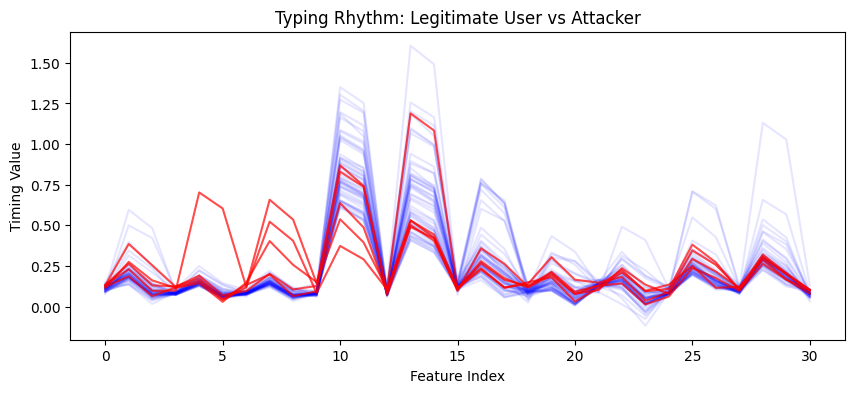

In [14]:
plt.figure(figsize=(10, 4))

for i in range(50):
    plt.plot(X_user.iloc[i].values, color='blue', alpha=0.1)

for i in range(5):
    plt.plot(X_test_attacker.iloc[i].values, color='red', alpha=0.7)

plt.title("Typing Rhythm: Legitimate User vs Attacker")
plt.xlabel("Feature Index")
plt.ylabel("Timing Value")
plt.show()